# Exploratory Data Analysis of E-commerce Product Data

## Overview for the EDA Notebook on E-commerce Product Data

This notebook will perform Exploratory Data Analysis (EDA) on a dataset containing detailed product information from an e-commerce platform. The dataset includes the following features:
- **Product ID**: Unique identifier for each product.
- **Gender**: Target gender for the product (e.g., Men, Women).
- **Master Category**: The main category of the product (e.g., Apparel, Accessories).
- **Subcategory**: Specific subcategory within the master category (e.g., Topwear, Bottomwear, Watches).
- **Article Type**: Specific type of article (e.g., Shirts, Jeans, Watches).
- **Base Colour**: The primary color of the product.
- **Season**: The season associated with the product (e.g., Fall, Summer, Winter).
- **Year**: The year the product was released.
- **Usage**: The intended usage of the product (e.g., Casual, Party).
- **Product** Display Name: The name of the product as displayed on the platform.

## Objectives:

- **Category Analysis**: Explore the distribution of products across different master categories and subcategories to understand the product mix.
- **Gender Insights**: Analyze products based on target gender to identify market segmentation and potential gaps.
- **Color Trends**: Identify popular base colors and how color preferences vary across categories and seasons.
- **Seasonality and Yearly Trends**: Examine product releases over different seasons and years to uncover seasonal trends and growth patterns.
- **Usage Patterns**: Investigate the intended usage types (e.g., Casual, Party) to understand consumer preferences and product positioning.
- **Brand and Product Popularity**: Utilize the product display names to identify top brands and popular products.


This EDA aims to provide valuable insights into the product offerings and trends within the e-commerce platform, aiding in strategic decision-making for merchandising, marketing, and inventory management.

In [23]:
import pandas as pd 
import sys
import os as os
import matplotlib.pyplot as plt
import seaborn as sns


### Data Understanding

In [4]:
product_df = pd.read_csv('product.csv', quotechar='"', on_bad_lines='skip')
product_df.head()

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011.0,Casual,Turtle Check Men Navy Blue Shirt
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012.0,Casual,Peter England Men Party Blue Jeans
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016.0,Casual,Titan Women Silver Watch
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011.0,Casual,Manchester United Men Solid Black Track Pants
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012.0,Casual,Puma Men Grey T-shirt


In [5]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44424 entries, 0 to 44423
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  44424 non-null  int64  
 1   gender              44424 non-null  object 
 2   masterCategory      44424 non-null  object 
 3   subCategory         44424 non-null  object 
 4   articleType         44424 non-null  object 
 5   baseColour          44409 non-null  object 
 6   season              44403 non-null  object 
 7   year                44423 non-null  float64
 8   usage               44107 non-null  object 
 9   productDisplayName  44417 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.4+ MB


In [6]:
product_df.shape

(44424, 10)

In [7]:
product_df.dtypes

id                      int64
gender                 object
masterCategory         object
subCategory            object
articleType            object
baseColour             object
season                 object
year                  float64
usage                  object
productDisplayName     object
dtype: object

### Data cleaning

In [ ]:
#change the some columns to the appropriate data type 

In [ ]:
#remove uncessary index column

In [8]:
# checking if there are any duplicated values in the dataset
product_df.duplicated().value_counts()

False    44424
Name: count, dtype: int64

In [9]:
# checking if there are any null values in the dataset
product_df.isnull().values.any()

np.True_

In [10]:
#checking how many null values exist per each column

product_df.isnull().sum().sum()
product_df.isnull().sum(axis=0)

id                      0
gender                  0
masterCategory          0
subCategory             0
articleType             0
baseColour             15
season                 21
year                    1
usage                 317
productDisplayName      7
dtype: int64

In [11]:
product_df[product_df['productDisplayName'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
3677,42878,Women,Accessories,Bags,Clutches,Maroon,Summer,2012.0,Casual,NaN
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
22089,42863,Women,Accessories,Bags,Clutches,Brown,Summer,2012.0,Casual,NaN
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
37531,30992,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
40675,43119,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [10]:
product_df[product_df['baseColour'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
6206,11293,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
9516,41347,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Black Texas Jeans
12763,11288,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Texas Jeans
14291,30991,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
15526,57698,Women,Personal Care,Skin,Face Moisturisers,NaN,Spring,2017.0,Casual,Lotus Herbals Quincenourish Quince Seed Nouris...
15708,41355,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Millard Jeans
17268,43122,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS Man Eau De Toilette 75 ml
17639,45687,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN
20209,11309,Men,Apparel,Bottomwear,Jeans,NaN,Fall,2016.0,Casual,Wrangler Men Blue Floyd Jeans
23484,45698,Women,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,NaN


In [11]:
product_df[product_df['usage'].isnull()]

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName
87,56489,Women,Personal Care,Nails,Nail Polish,Bronze,Spring,2017.0,NaN,Streetwear Ash Nail Polish # 31
92,52029,Unisex,Apparel,Topwear,Rain Jacket,Coffee Brown,Summer,2012.0,NaN,Just Natural Unisex Charcoal Rain Jacket
292,55001,Women,Personal Care,Lips,Lipstick,Pink,Spring,2017.0,NaN,Lakme Absolute Lip Last Day Kiss Lip Colour
479,57563,Women,Personal Care,Lips,Lipstick,Brown,Spring,2017.0,NaN,Lotus Herbals Pure Colours Nutty Brown Lipstic...
511,55006,Women,Personal Care,Lips,Lip Gloss,Copper,Spring,2017.0,NaN,Lakme Sheer Satin Lip Gloss 51
...,...,...,...,...,...,...,...,...,...,...
43633,56605,Women,Personal Care,Makeup,Kajal and Eyeliner,Black,Spring,2017.0,NaN,Streetwear Black Eye Liner 01
44079,57715,Women,Personal Care,Lips,Lip Gloss,Red,Spring,2017.0,NaN,Lotus Herbals Seduction Sappy Watermelon Lip G...
44224,43120,Men,Personal Care,Fragrance,Perfume and Body Mist,NaN,Spring,2017.0,NaN,GUESS by Marciano Men Eau De Toilette 50 ml
44227,55045,Women,Personal Care,Lips,Lipstick,Purple,Spring,2017.0,NaN,Lakme Enrich Satins Lipstick 461


In [15]:
cleaned_prpoduct_df=product_df.dropna()

In [16]:
cleaned_prpoduct_df.shape

(44077, 10)

### Data Visualization

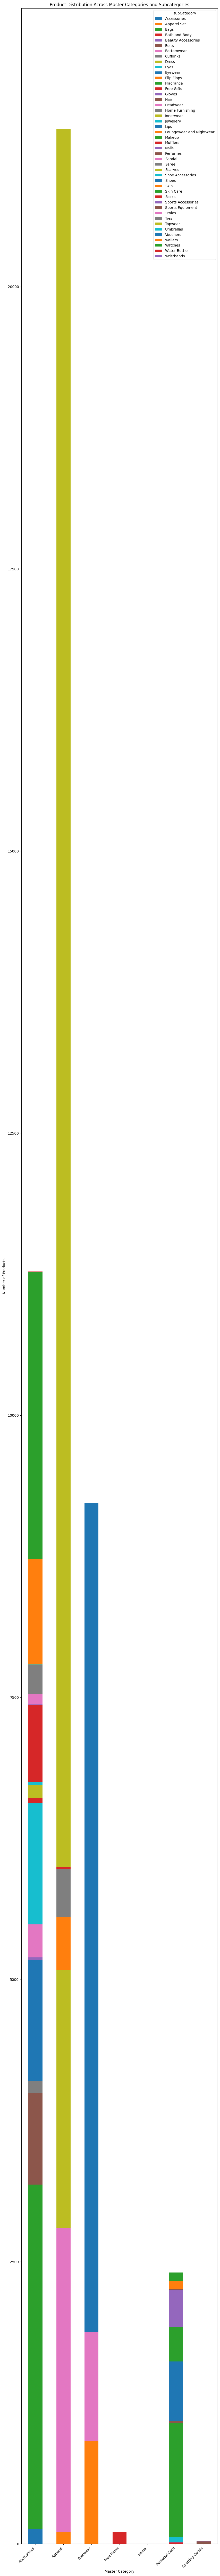

In [29]:
category_counts = product_df.groupby(['masterCategory', 'subCategory']).size().unstack(fill_value=0)

# Plot a stacked bar chart
category_counts.plot(kind='bar', stacked=True, figsize=(10, 10))
plt.title('Product Distribution Across Master Categories and Subcategories')
plt.xlabel('Master Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.subplots_adjust(right=0.85)
plt.show()

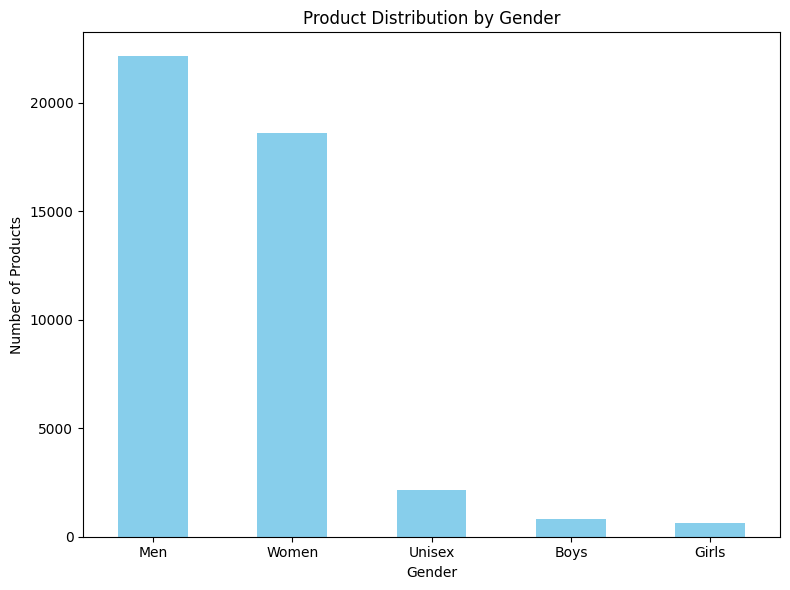

In [19]:
# Count the number of products by gender
gender_counts = product_df['gender'].value_counts()

# Plot the bar chart
gender_counts.plot(kind='bar', color='skyblue', figsize=(8, 6))
plt.title('Product Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Products')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


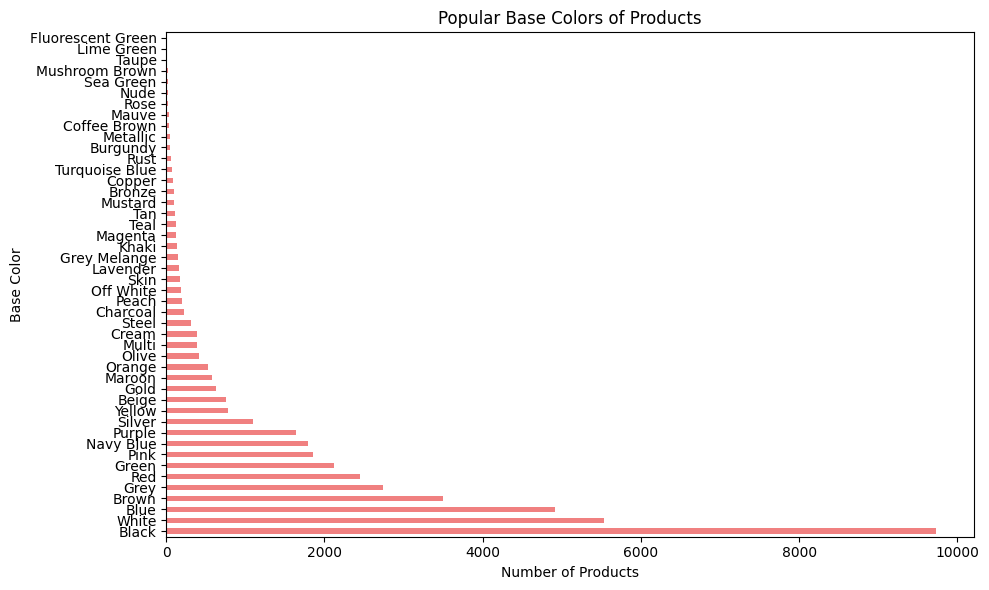

In [21]:
# Count the occurrences of each base color
color_counts = product_df['baseColour'].value_counts()

# Plot the bar chart
color_counts.plot(kind='barh', color='lightcoral', figsize=(10, 6))
plt.title('Popular Base Colors of Products')
plt.xlabel('Number of Products')
plt.ylabel('Base Color')
plt.tight_layout()
plt.show()


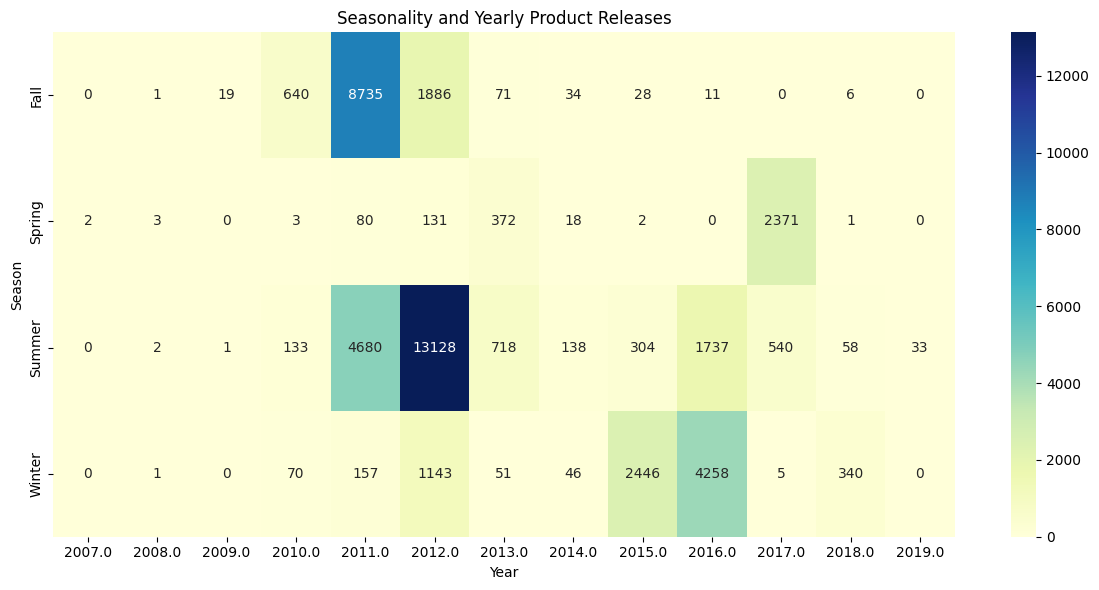

In [24]:
# Count the number of products per season and year
season_year_counts = product_df.groupby(['season', 'year']).size().unstack(fill_value=0)

# Plot a heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(season_year_counts, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Seasonality and Yearly Product Releases')
plt.xlabel('Year')
plt.ylabel('Season')
plt.tight_layout()
plt.show()


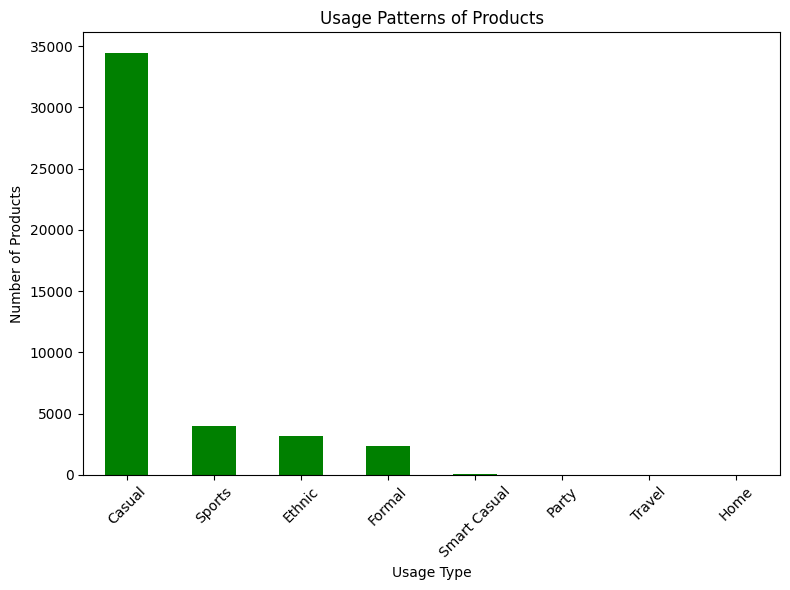

In [25]:
# Count the number of products for each usage type
usage_counts = product_df['usage'].value_counts()

# Plot the bar chart
usage_counts.plot(kind='bar', color='green', figsize=(8, 6))
plt.title('Usage Patterns of Products')
plt.xlabel('Usage Type')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
